W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


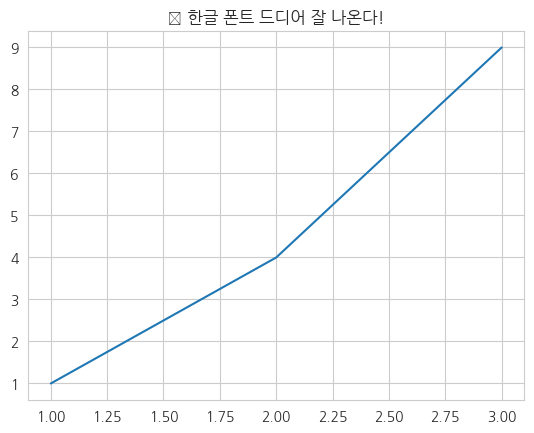

In [ ]:
# ✅ 1. 나눔 폰트 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum

# ✅ 2. Matplotlib에 폰트 수동 등록
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

# Colab에 설치된 나눔폰트 경로 찾기
font_paths = glob.glob("/usr/share/fonts/truetype/nanum/*.ttf")
for path in font_paths:
    fm.fontManager.addfont(path)

# ✅ 3. 폰트 설정 적용
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

# ✅ 4. 테스트
plt.title("🎉 한글 폰트 드디어 잘 나온다!")
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()


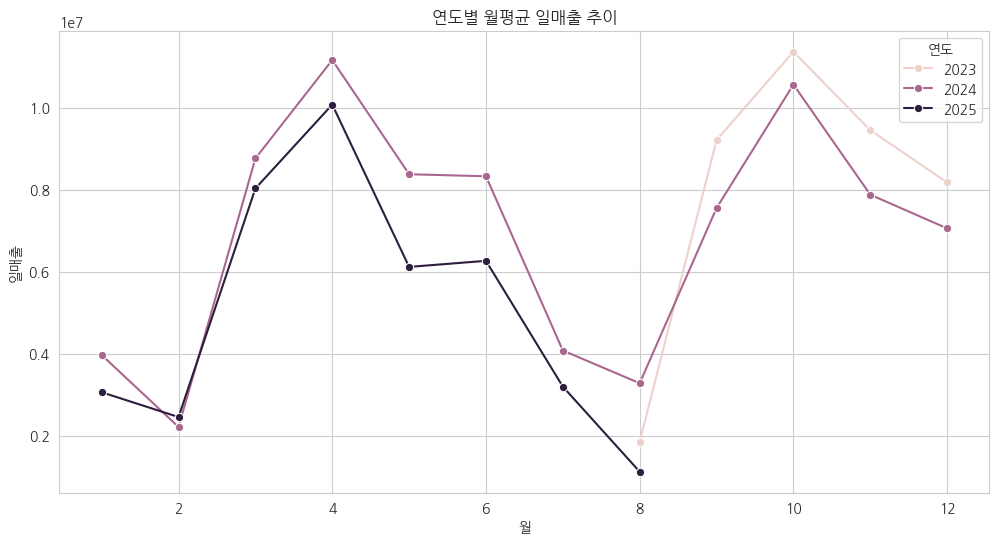

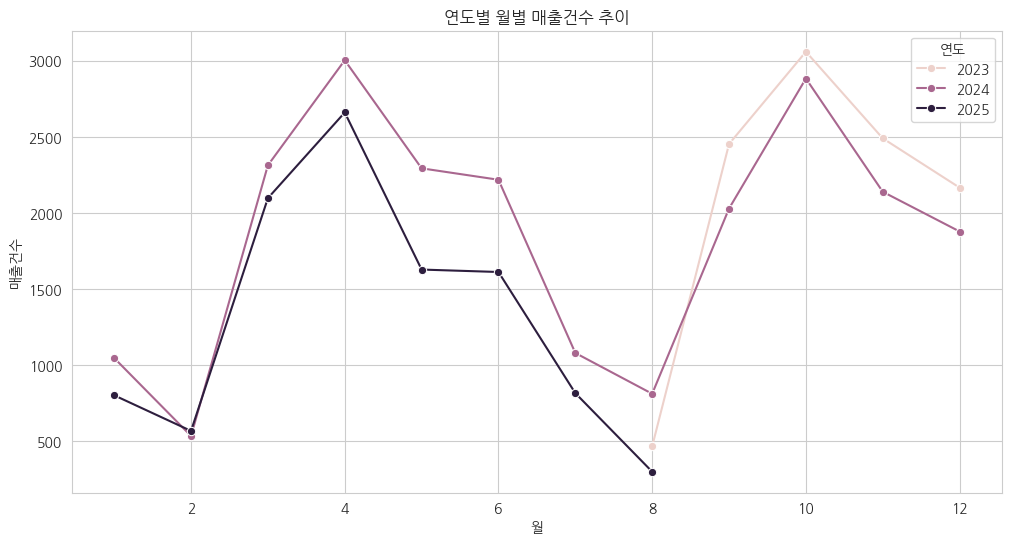

/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-650375839.py:100: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  plt.tight_layou

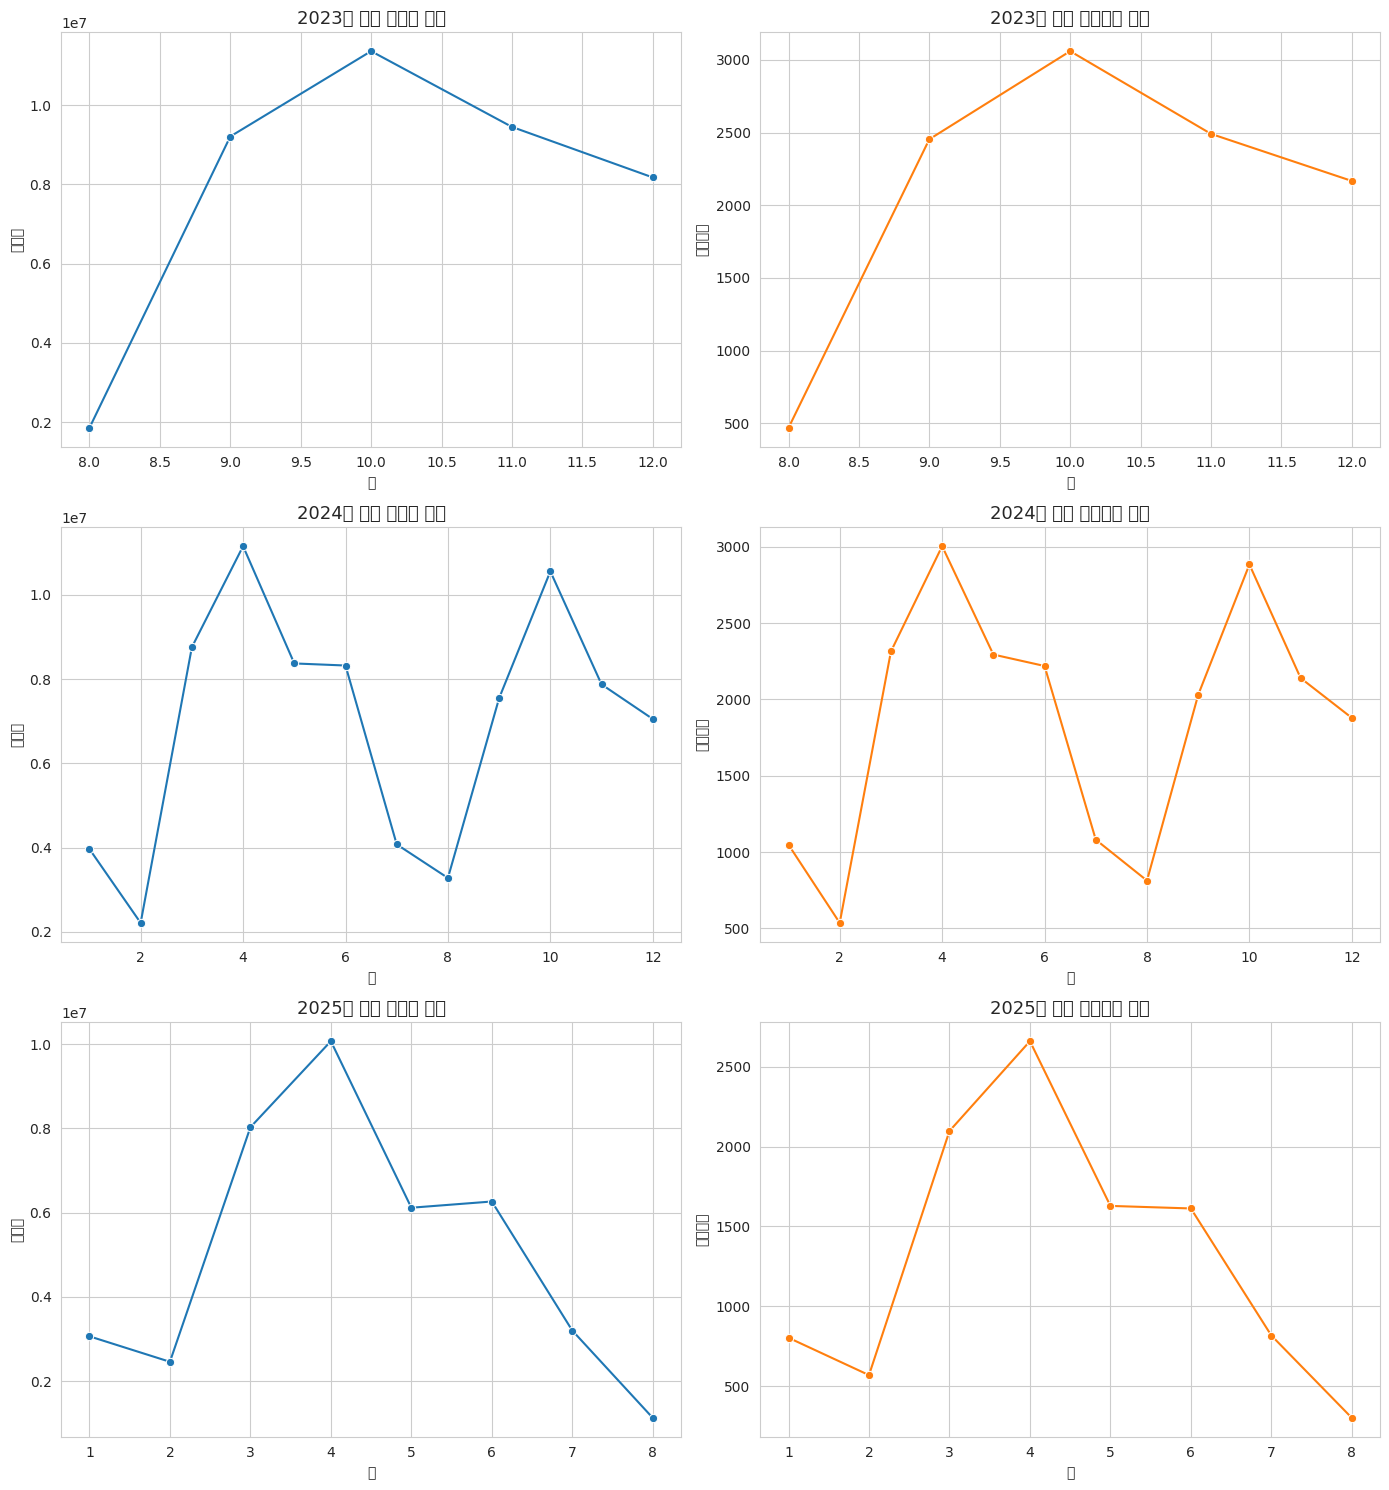

In [ ]:
# ==============================
# 📊 CSV 파일용 자동 EDA 코드 (Colab 한글 완벽 호환)
# ==============================

import seaborn as sns
import pandas as pd
import numpy as np


# ==============================
# 1️⃣ CSV 파일 불러오기
# ==============================
df = pd.read_csv("/content/drive/MyDrive/기계학습/팀플/월_매출.csv", encoding='utf-8')

# ==============================
# 2️⃣ 데이터 전처리
# ==============================
# '영업일자'를 datetime으로 변환
df['영업일자'] = pd.to_datetime(df['영업일자'], errors='coerce')

# '일매출', '객단가'를 숫자로 변환 (쉼표, 공백 제거)
for col in ['일매출', '객단가']:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 결측 제거
df = df.dropna(subset=['영업일자'])

# 연도, 월, 일 추가
df['연도'] = df['영업일자'].dt.year
df['월'] = df['영업일자'].dt.month
df['일'] = df['영업일자'].dt.day

# ==============================
# 3️⃣ 연도별 집계 (x축: 월)
# ==============================
yearly_sales = df.groupby(['연도', '월'], as_index=False)[['일매출', '매출건수']].sum()

# ==============================
# 4️⃣ 월별 집계 (x축: 날짜)
# ==============================
# 최신 연도 기준으로 데이터 필터링
latest_year = df['연도'].max()

# ==============================
# 5️⃣ 시각화
# ==============================

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='월', y='일매출', hue='연도', marker='o')
plt.title('연도별 월평균 일매출 추이')
plt.xlabel('월')
plt.ylabel('일매출')
plt.legend(title='연도')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='월', y='매출건수', hue='연도', marker='o')
plt.title('연도별 월별 매출건수 추이')
plt.xlabel('월')
plt.ylabel('매출건수')
plt.legend(title='연도')
plt.show()

# ==============================
# 3️⃣ 월별 합계 데이터 (연도별)
# ==============================
monthly_summary = (
    df.groupby(['연도', '월'], as_index=False)[['일매출', '매출건수']]
    .sum()
    .sort_values(['연도', '월'])
)

# ==============================
# 4️⃣ 그래프 시각화 (3행 2열: 연도별 묶음)
# ==============================

years = sorted(df['연도'].unique())
sns.set_style("whitegrid")

fig, axes = plt.subplots(len(years), 2, figsize=(14, 5 * len(years)))

for i, year in enumerate(years):
    sub = monthly_summary[monthly_summary['연도'] == year]

    # (왼쪽) 일매출
    sns.lineplot(data=sub, x='월', y='일매출', marker='o', ax=axes[i, 0], color='tab:blue')
    axes[i, 0].set_title(f"{year}년 월별 일매출 추이", fontsize=13)
    axes[i, 0].set_xlabel("월")
    axes[i, 0].set_ylabel("일매출")
    axes[i, 0].grid(True)

    # (오른쪽) 매출건수
    sns.lineplot(data=sub, x='월', y='매출건수', marker='o', ax=axes[i, 1], color='tab:orange')
    axes[i, 1].set_title(f"{year}년 월별 매출건수 추이", fontsize=13)
    axes[i, 1].set_xlabel("월")
    axes[i, 1].set_ylabel("매출건수")
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

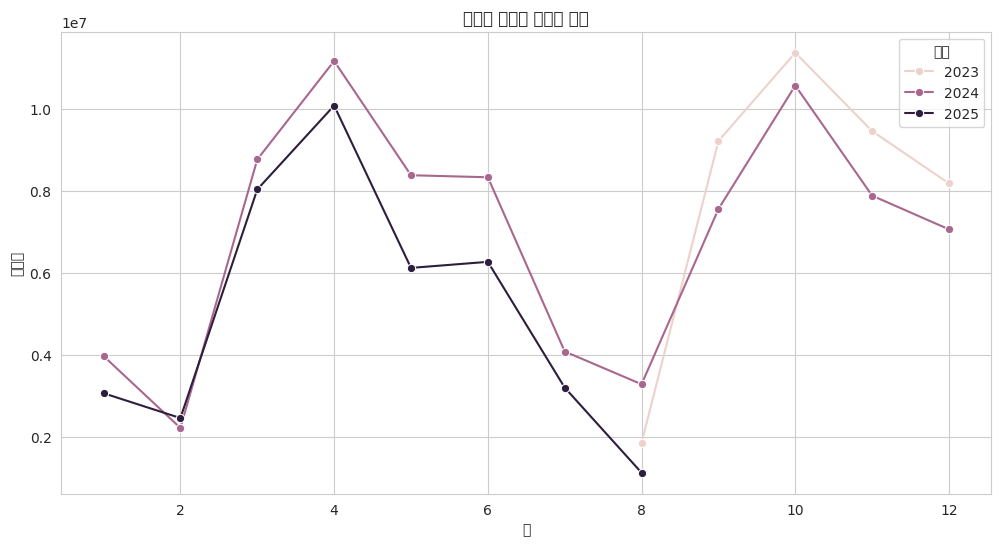

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

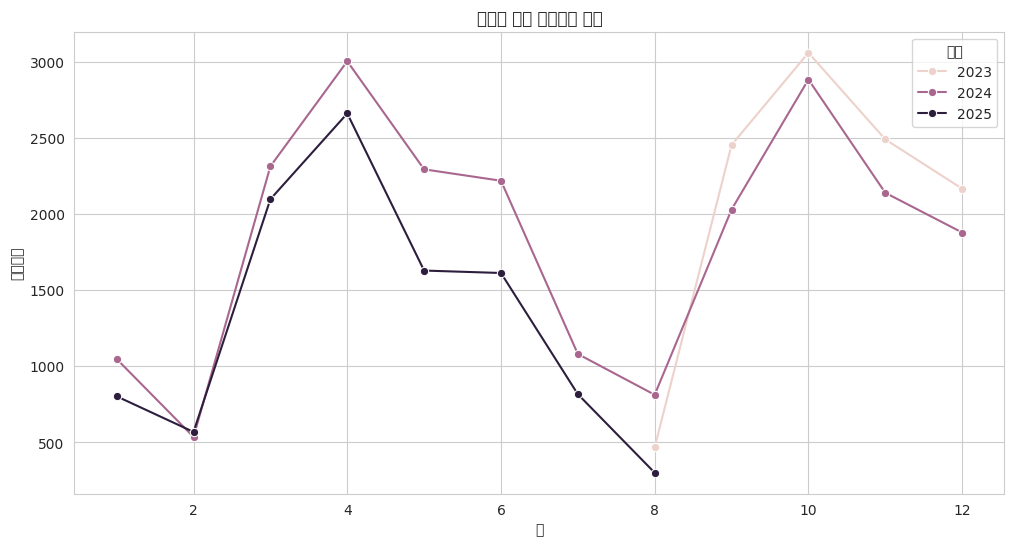

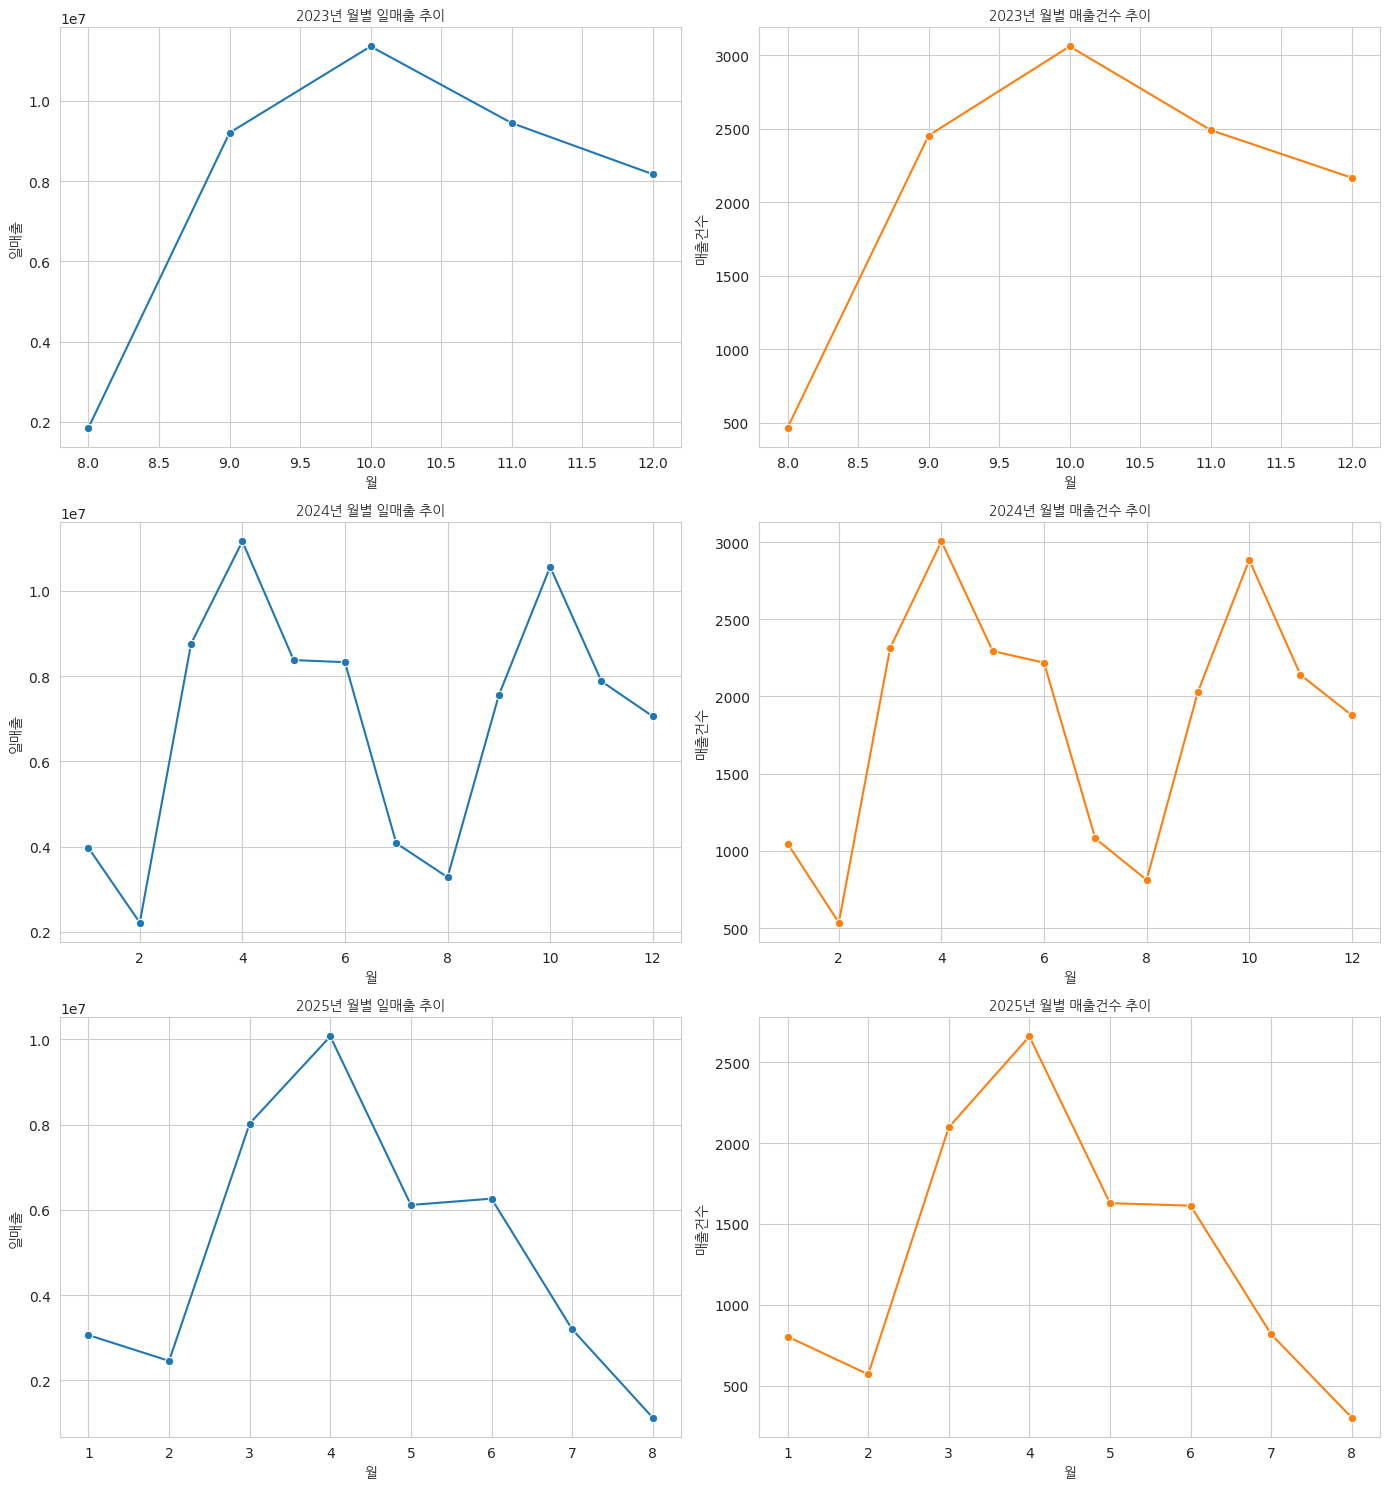

In [ ]:
# ==============================
# 📊 CSV 파일용 자동 EDA 코드 (한글 폰트 깨짐 완전 방지, 설치 코드 없음)
# ==============================

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ==============================
# 1️⃣ CSV 파일 불러오기
# ==============================
df = pd.read_csv("/content/drive/MyDrive/기계학습/팀플/월_매출.csv", encoding='utf-8')

# ==============================
# 2️⃣ 데이터 전처리
# ==============================
df['영업일자'] = pd.to_datetime(df['영업일자'], errors='coerce')

for col in ['일매출', '객단가']:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['영업일자'])
df['연도'] = df['영업일자'].dt.year
df['월'] = df['영업일자'].dt.month
df['일'] = df['영업일자'].dt.day

# ==============================
# 3️⃣ 연도별 집계 (x축: 월)
# ==============================
yearly_sales = df.groupby(['연도', '월'], as_index=False)[['일매출', '매출건수']].sum()

# ==============================
# 4️⃣ 연도별 전체 비교 그래프
# ==============================
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='월', y='일매출', hue='연도', marker='o')
plt.title('연도별 월평균 일매출 추이')
plt.xlabel('월')
plt.ylabel('일매출')
plt.legend(title='연도')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sales, x='월', y='매출건수', hue='연도', marker='o')
plt.title('연도별 월별 매출건수 추이')
plt.xlabel('월')
plt.ylabel('매출건수')
plt.legend(title='연도')
plt.show()

# ==============================
# 5️⃣ 연도별 월별 합계 (3행×2열 그래프)
# ==============================
monthly_summary = (
    df.groupby(['연도', '월'], as_index=False)[['일매출', '매출건수']]
    .sum()
    .sort_values(['연도', '월'])
)

years = sorted(df['연도'].unique())
sns.set_style("whitegrid")

fig, axes = plt.subplots(len(years), 2, figsize=(14, 5 * len(years)))

# ✅ 폰트 직접 지정 (이미 Colab에 설치된 나눔고딕 사용)
font_prop = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

for i, year in enumerate(years):
    sub = monthly_summary[monthly_summary['연도'] == year]

    # (왼쪽) 일매출
    sns.lineplot(data=sub, x='월', y='일매출', marker='o', ax=axes[i, 0], color='tab:blue')
    axes[i, 0].set_title(f"{year}년 월별 일매출 추이", fontsize=13, fontproperties=font_prop)
    axes[i, 0].set_xlabel("월", fontproperties=font_prop)
    axes[i, 0].set_ylabel("일매출", fontproperties=font_prop)
    axes[i, 0].grid(True)

    # (오른쪽) 매출건수
    sns.lineplot(data=sub, x='월', y='매출건수', marker='o', ax=axes[i, 1], color='tab:orange')
    axes[i, 1].set_title(f"{year}년 월별 매출건수 추이", fontsize=13, fontproperties=font_prop)
    axes[i, 1].set_xlabel("월", fontproperties=font_prop)
    axes[i, 1].set_ylabel("매출건수", fontproperties=font_prop)
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


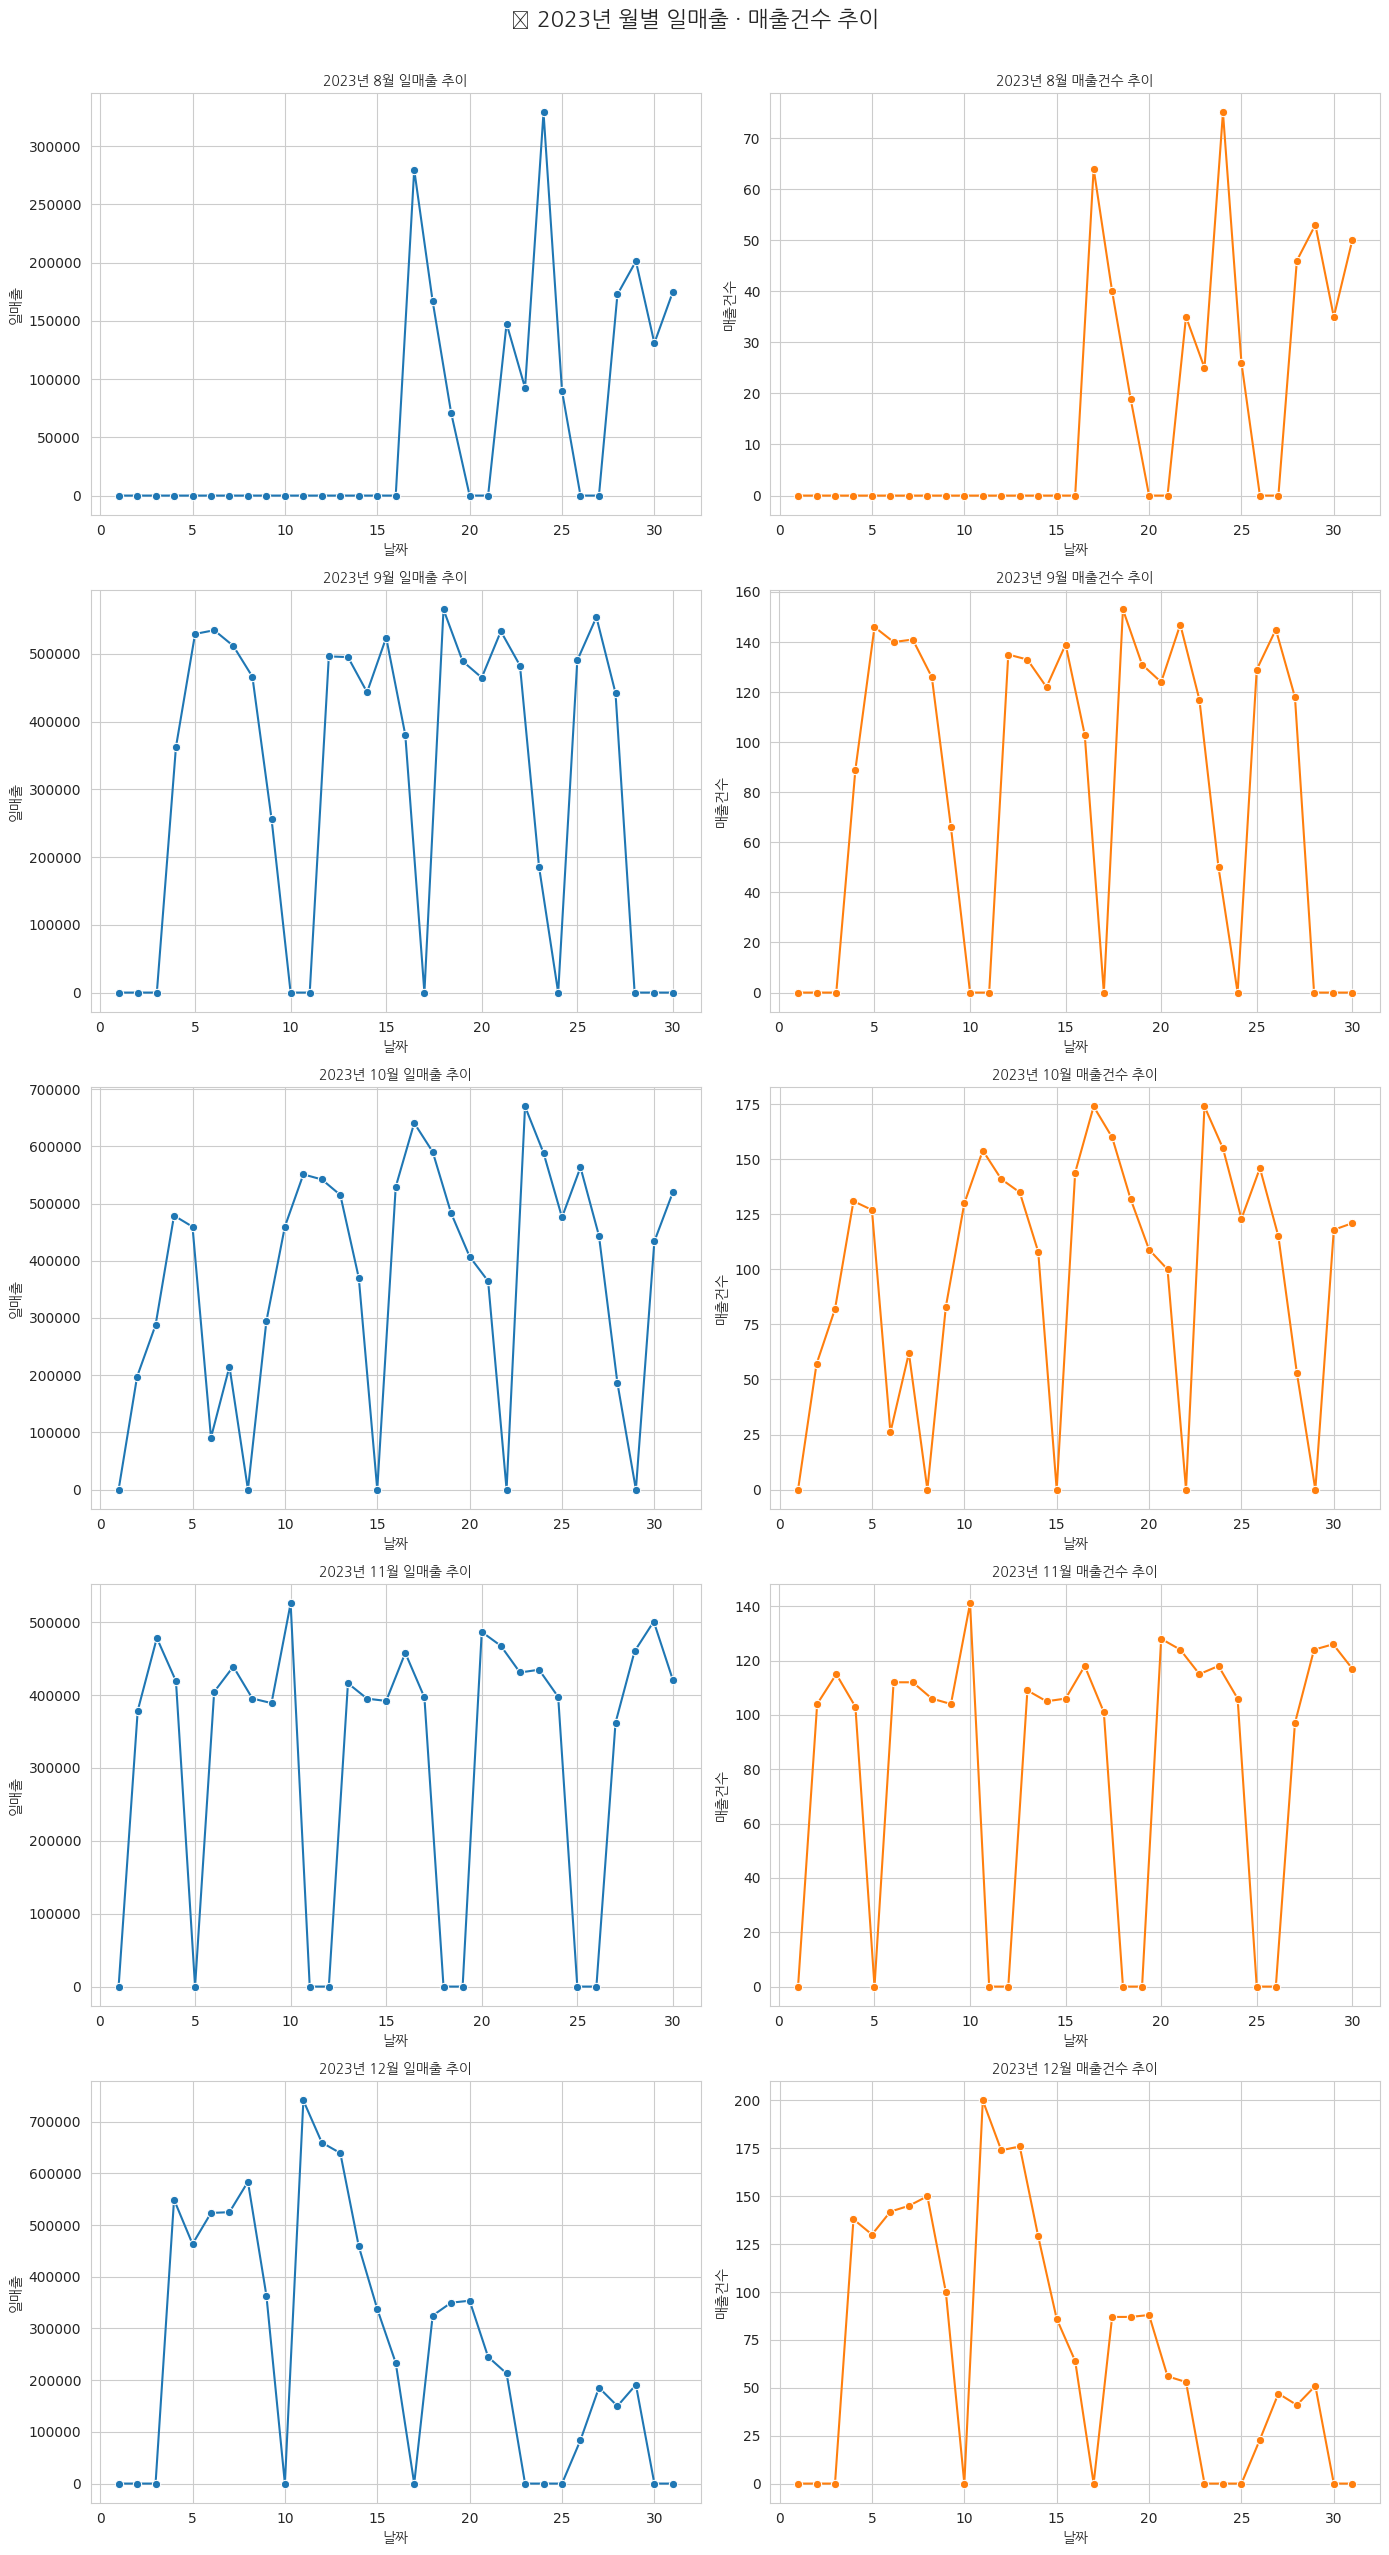

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


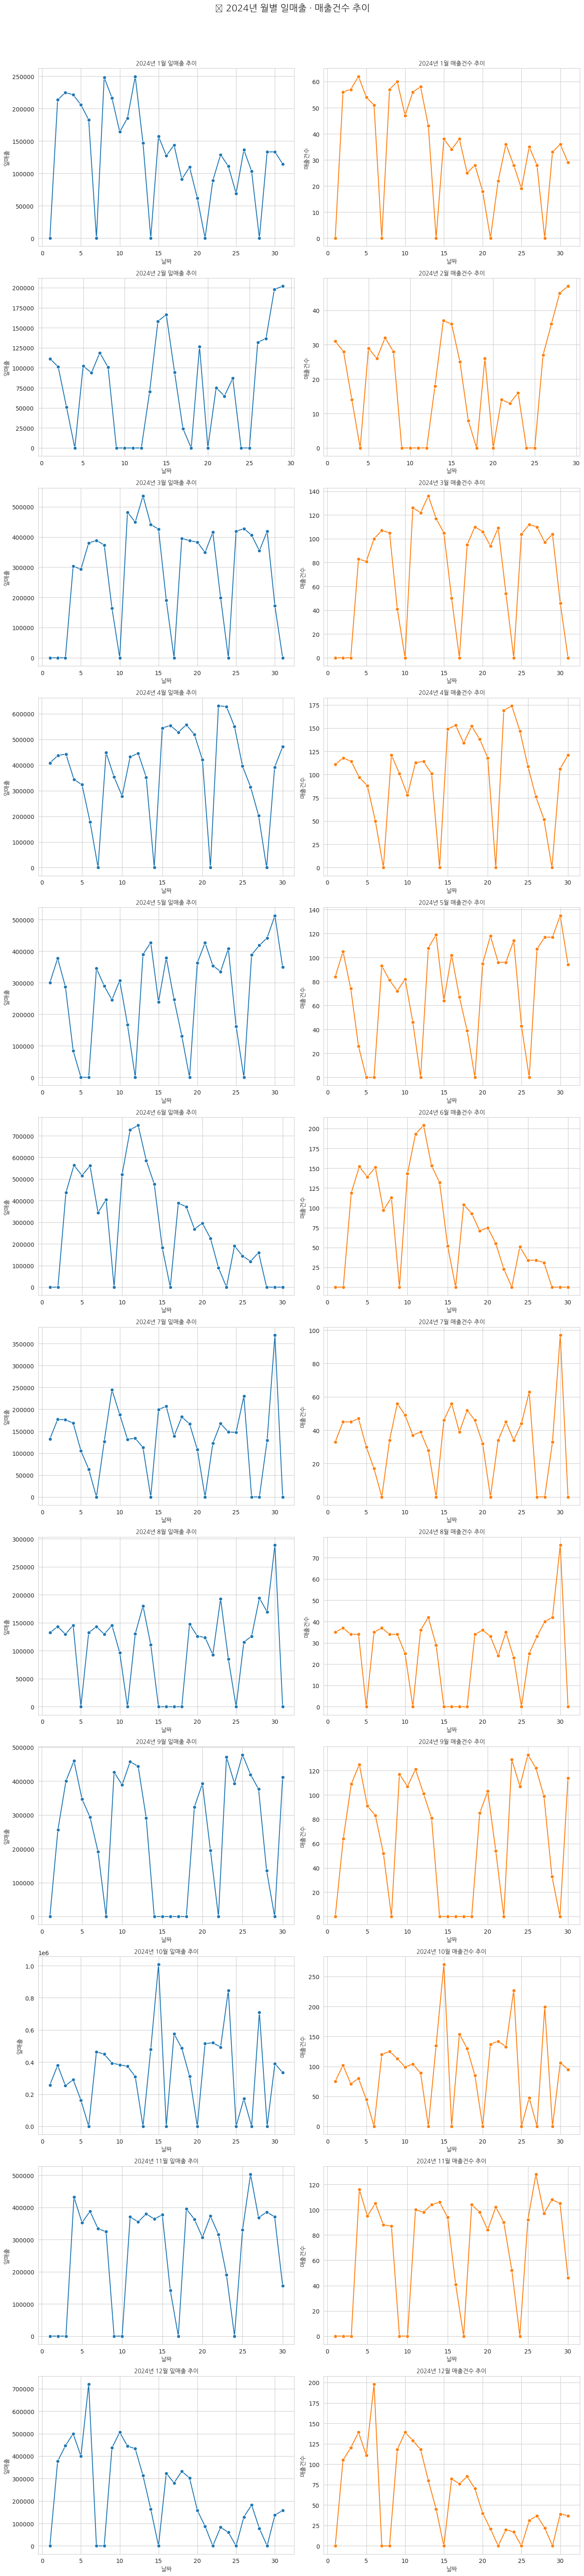

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


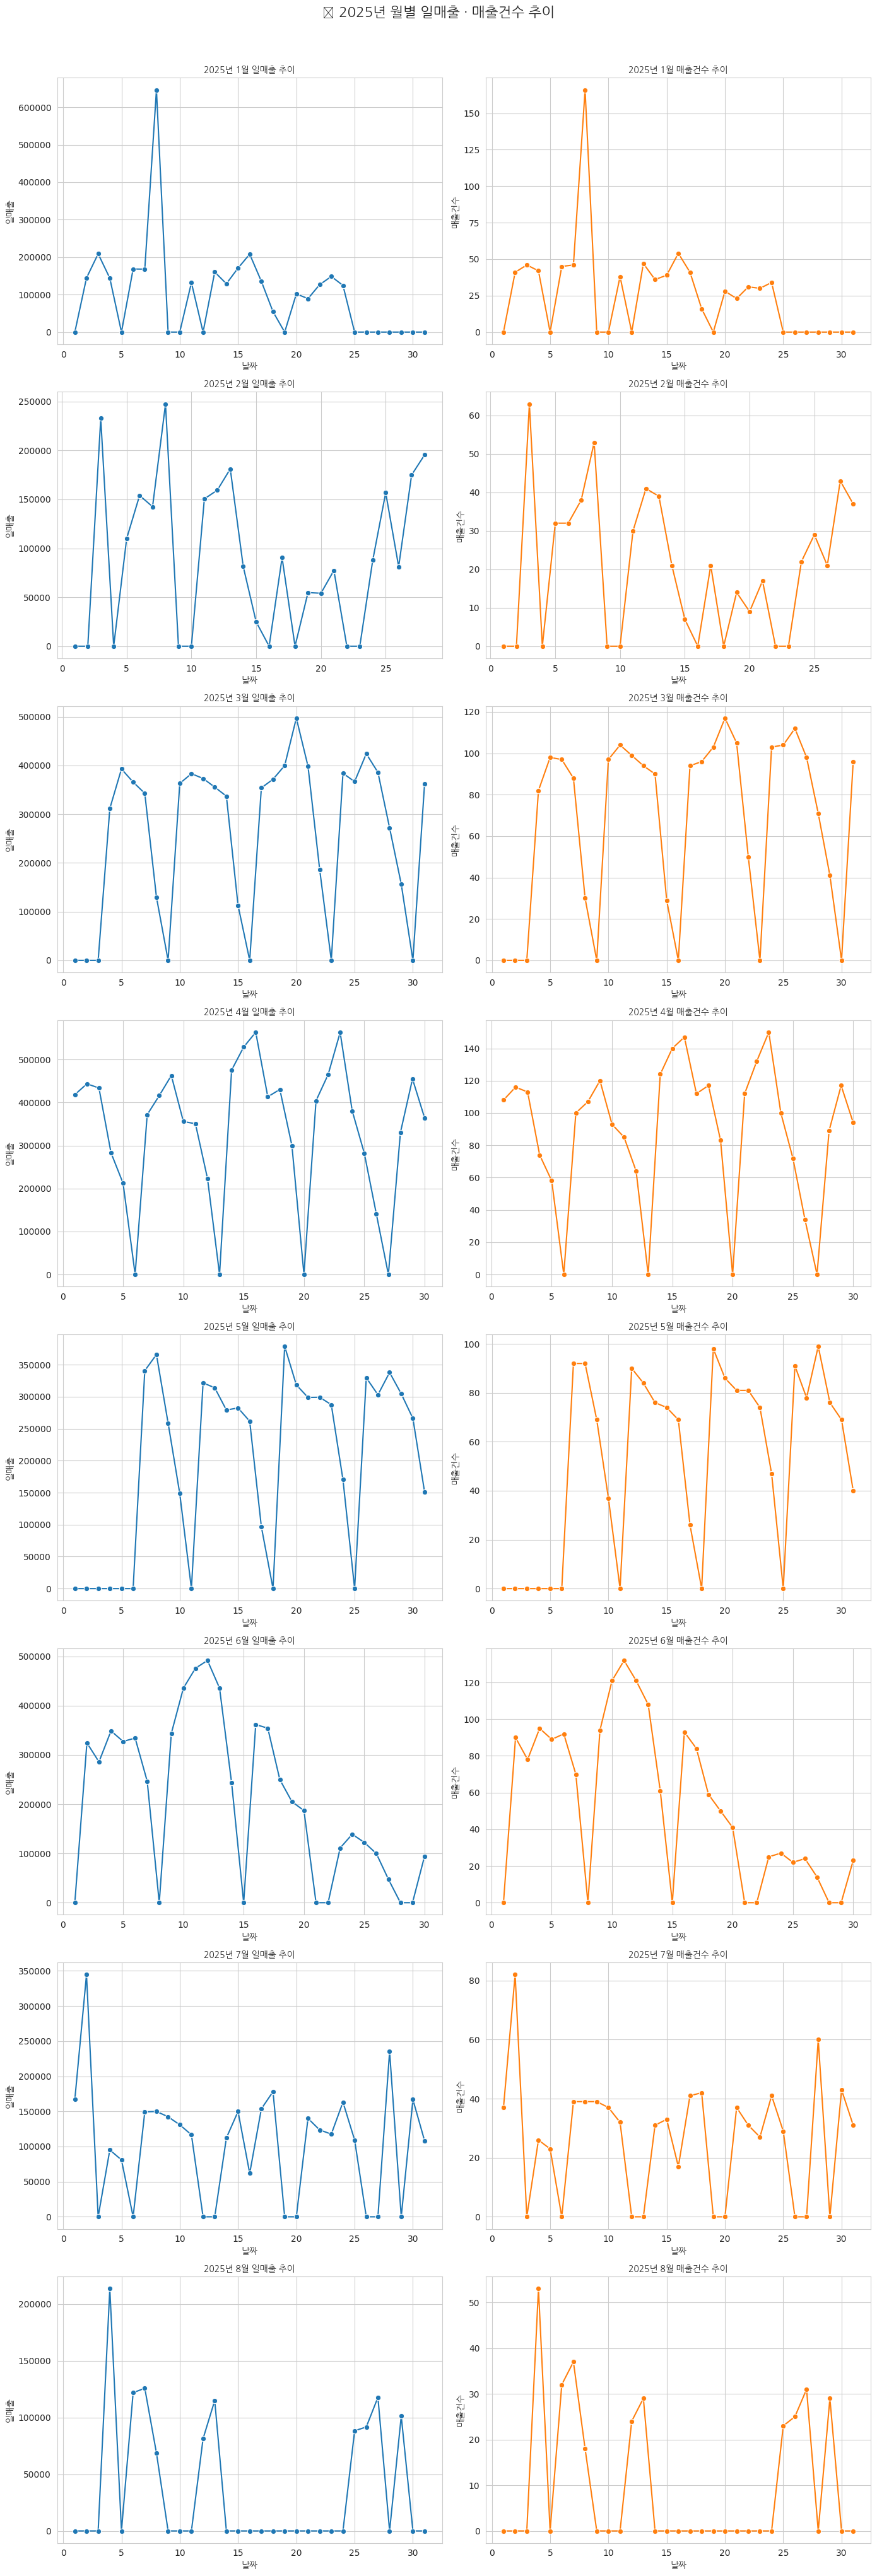

In [ ]:
# ==============================
# 📊 연도별 · 월별 · 일단위 매출 추이 시각화 (각 월별 2개 그래프 생성)
# ==============================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ==============================
# 1️⃣ CSV 파일 불러오기
# ==============================
df = pd.read_csv("/content/drive/MyDrive/기계학습/팀플/월_매출.csv", encoding='utf-8')

# ==============================
# 2️⃣ 데이터 전처리
# ==============================
df['영업일자'] = pd.to_datetime(df['영업일자'], errors='coerce')

for col in ['일매출', '객단가']:
    df[col] = df[col].astype(str).str.replace(',', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['영업일자'])
df['연도'] = df['영업일자'].dt.year
df['월'] = df['영업일자'].dt.month
df['일'] = df['영업일자'].dt.day

# ==============================
# 3️⃣ 연도별 · 월별 그래프 생성
# ==============================
years = sorted(df['연도'].unique())
sns.set_style("whitegrid")

font_prop = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf")

for year in years:
    df_year = df[df['연도'] == year]
    months = sorted(df_year['월'].unique())

    # 월 수에 따라 subplot 자동 생성 (2개씩 = 일매출 / 매출건수)
    fig, axes = plt.subplots(len(months), 2, figsize=(14, 5 * len(months)))

    # axes가 1차원으로 반환될 수도 있으므로 강제 reshape
    if len(months) == 1:
        axes = np.array([axes])  # 한 달밖에 없으면 1행으로 맞추기

    for i, month in enumerate(months):
        sub = df_year[df_year['월'] == month]

        # (왼쪽) 일매출
        sns.lineplot(data=sub, x='일', y='일매출', marker='o', ax=axes[i, 0], color='tab:blue')
        axes[i, 0].set_title(f"{year}년 {month}월 일매출 추이", fontsize=13, fontproperties=font_prop)
        axes[i, 0].set_xlabel("날짜", fontproperties=font_prop)
        axes[i, 0].set_ylabel("일매출", fontproperties=font_prop)
        axes[i, 0].grid(True)

        # (오른쪽) 매출건수
        sns.lineplot(data=sub, x='일', y='매출건수', marker='o', ax=axes[i, 1], color='tab:orange')
        axes[i, 1].set_title(f"{year}년 {month}월 매출건수 추이", fontsize=13, fontproperties=font_prop)
        axes[i, 1].set_xlabel("날짜", fontproperties=font_prop)
        axes[i, 1].set_ylabel("매출건수", fontproperties=font_prop)
        axes[i, 1].grid(True)

    plt.tight_layout()
    plt.suptitle(f"📅 {year}년 월별 일매출 · 매출건수 추이", fontproperties=font_prop, fontsize=16, y=1.02)
    plt.show()
